# Project: Investigate a Dataset (Gun information in the US)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
#Importing the needed libraries

import pandas as pd #Pandas would help with the data wrangling process
import numpy as np  #Numpy helps with numbers and statistical manipulation
import matplotlib.pyplot as plt #This library helps with data viz
%matplotlib inline  
#This helps matplot plots output to be within the notebook

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Load the Data

In [2]:
data = pd.read_excel('C:\\Users\\USER\\Downloads\\Gun_data.xlsx')

data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-06-01,Alabama,19380.0,389.0,20615.0,12473.0,1670.0,1168,0.0,17.0,...,0.0,0.0,0.0,26.0,29.0,8.0,0.0,0.0,0.0,59049
1,2022-06-01,Alaska,225.0,13.0,3265.0,2451.0,355.0,223,0.0,3.0,...,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,6821
2,2022-06-01,Arizona,7912.0,1369.0,21680.0,10684.0,2246.0,1487,0.0,5.0,...,0.0,0.0,0.0,12.0,7.0,2.0,1.0,0.0,0.0,47044
3,2022-06-01,Arkansas,2495.0,494.0,7462.0,4881.0,624.0,453,11.0,10.0,...,0.0,0.0,0.0,7.0,11.0,1.0,0.0,0.0,0.0,18337
4,2022-06-01,California,20367.0,11254.0,43113.0,27018.0,7422.0,0,0.0,0.0,...,135.0,0.0,0.0,7848.0,3128.0,779.0,39.0,19.0,1.0,123930


### Data Cleaning (Replace this with more specific notes!)

In [3]:
data.columns  #This checks the column names in the data

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [4]:
data.shape  #check the number of rows(15620) and columns(27)

(15620, 27)

In [5]:
data.dtypes #checks the data types of the columns to ensure they are properly represented

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [6]:
data['state'].value_counts()  #counts the unique values in 'state' column and the number of times they appeared.

Georgia                 284
Colorado                284
Puerto Rico             284
New Jersey              284
Idaho                   284
New York                284
Mariana Islands         284
Indiana                 284
Florida                 284
New Hampshire           284
New Mexico              284
Wisconsin               284
Iowa                    284
Alabama                 284
Kentucky                284
Kansas                  284
Massachusetts           284
Oklahoma                284
Pennsylvania            284
West Virginia           284
North Dakota            284
Ohio                    284
Hawaii                  284
Wyoming                 284
Maine                   284
Vermont                 284
South Dakota            284
Oregon                  284
Texas                   284
Virginia                284
Michigan                284
Alaska                  284
Mississippi             284
Tennessee               284
Louisiana               284
Rhode Island        

In [7]:
data.describe()  #check the statistical description of each column except categorical column

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,15596.000000,4.235000e+03,15600.000000,15601.000000,8635.000000,15620.00000,15597.000000,13677.000000,13675.000000,8250.000000,...,4950.000000,4125.000000,3960.000000,5885.000000,5885.000000,5885.000000,5610.000000,5885.000000,5390.000000,1.562000e+04
mean,7504.984227,9.430650e+03,7422.142500,8019.739760,596.062420,308.04251,50.747451,5.131827,7.286508,0.411152,...,3.503838,0.137212,0.145707,54.817162,32.220051,5.968734,1.071301,0.984537,0.130983,2.712291e+04
std,26905.136173,5.994066e+04,10953.276375,9175.684297,1386.640459,777.39996,548.469444,11.282803,15.493244,1.419492,...,22.721047,0.940564,0.944658,437.140836,189.191463,39.837020,5.084199,4.058453,0.522552,5.001187e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1082.750000,2206.000000,34.000000,13.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.190750e+03
50%,891.000000,0.000000e+00,3660.500000,5326.000000,196.000000,137.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.374300e+04
75%,5884.750000,1.220000e+02,8995.250000,10872.000000,639.000000,342.00000,0.000000,5.000000,7.000000,0.000000,...,1.000000,0.000000,0.000000,16.000000,15.000000,2.000000,0.000000,1.000000,0.000000,3.029975e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,38907.00000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,10623.000000,4159.000000,829.000000,70.000000,62.000000,18.000000,1.427917e+06


### checking for missing data

In [8]:
data.isnull().sum()  #The values shows the number of row values missing in each column

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

#### cleaning data: Filled the missing data with the *mean of each column* to avoid dropping the missing values in order to keep the numer of rows for each state intact. NOTE: This might lead to altering of the orginal values of the data.

In [9]:
data.fillna(data.mean().round(1), inplace=True)

<ipython-input-9-9d5875e9648c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean().round(1), inplace=True)


In [10]:
data.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

#### Research Questions
- Which state that has the highest gun possession?
- How many guns were accounted for in each state?
- How many guns were actually accounted for in each state compared to the Total guns recorded?
- Which state has the highest Gun permit?
- Trend of gun accussation through the years, Nov 1998 to June 2022?
- Total number of gun possessions in the US?
- Type of guns in demand over the years

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which state has the highest gun possession?)

In [11]:
data.groupby('state').sum()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2659253.0,1975310.2,3269592.0,3366185.0,177626.7,154532,34.0,5635.5,7356.5,160.6,...,679.0,21.9,21.2,11545.6,7236.4,1374.0,249.2,248.0,38.6,10416881
Alaska,25440.0,1953302.2,612254.0,737138.0,111715.7,41164,19.0,1298.5,1768.5,61.6,...,693.0,20.9,21.2,10609.6,6733.4,1151.0,212.2,189.0,20.6,1547182
Arizona,1111542.0,1998420.2,2865958.0,2038503.0,225770.7,156874,6643.0,2254.5,1477.5,153.6,...,730.0,20.9,21.2,11145.6,6605.4,1248.0,240.2,225.0,27.6,6784646
Arkansas,714846.0,2007031.2,1409504.0,2061081.0,113994.7,87486,3289.0,2505.5,4972.5,98.6,...,679.0,21.9,21.2,10575.6,6745.4,1190.0,230.2,219.0,29.6,5025112
California,8299554.0,2161032.2,8381164.0,7579080.0,715077.7,207875,34007.0,216.5,275.5,62.6,...,3149.0,20.9,21.2,147851.6,62644.4,12726.0,893.2,526.0,25.6,25723254
Colorado,894991.0,1952487.2,3754518.0,3546900.0,234986.7,394821,2972.7,216.5,273.5,53.6,...,822.0,20.9,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,8780094
Connecticut,2052607.0,1979836.2,1213737.0,757957.0,162395.7,8024,29096.0,178.5,255.5,115.6,...,679.0,20.9,21.2,15431.6,7501.4,2061.0,241.2,202.0,23.6,4184486
Delaware,46219.0,1952134.2,347034.0,339443.0,92182.7,15130,51.0,312.5,400.5,62.6,...,687.0,20.9,21.2,15076.6,8117.4,1417.0,282.2,226.0,21.6,780059
District of Columbia,27103.0,1952135.2,17707.0,948.0,75707.7,136,82.0,178.5,255.5,53.6,...,1706.0,20.9,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,47047


In [12]:
data.groupby('state').sum().sort_values(by = 'totals').tail(5) #Kentucky been the highest.

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Pennsylvania,3143479.0,1952143.2,5147706.0,10479414.0,83274.7,59386,24943.0,181.5,264.5,53.6,...,773.0,20.9,21.2,9699.6,5700.4,1062.0,200.2,177.0,18.6,18923594
California,8299554.0,2161032.2,8381164.0,7579080.0,715077.7,207875,34007.0,216.5,275.5,62.6,...,3149.0,20.9,21.2,147851.6,62644.4,12726.0,893.2,526.0,25.6,25723254
Texas,4812217.0,1952134.2,10067864.0,9787385.0,517875.7,559617,34405.0,12933.5,12140.5,397.6,...,717.0,27.9,21.2,15309.6,9858.4,1753.0,351.2,359.0,60.6,28130432
Illinois,14201533.0,22416337.2,3872929.0,2968947.0,91650.7,160103,1.0,183.6,255.5,53.6,...,679.0,20.9,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,41683663
Kentucky,32535312.0,12328297.2,2503274.0,2791048.0,129340.7,150567,37156.0,4028.5,6138.5,126.6,...,681.0,20.9,21.2,11470.6,7400.4,1201.0,251.2,241.0,33.6,49292581


#### Ans: Kentucky has the highest gun possessions. 

Based on the links below, Open carry is legal in Kentucky without a license for anyone at least 18 years of age that is not prohibited from possessing a firearm. Some areas are off-limits, including businesses primarily devoted to the sale of alcohol.

Kentucky is now a permitless carry state so concealed carry is legal for anyone at least 21 years old who can legally possess a firearm without a license/permit. Those wanting to conceal carry out-of-state will still need to get a conceal carry license (read more: https://www.usconcealedcarry.com/resources/ccw_reciprocity_map/ky-gun-laws/#:~:text=Kentucky%20is%20now%20a%20permitless,get%20a%20conceal%20carry%20license.)

Note: This might not be directly correlated to the crime rate in this state.

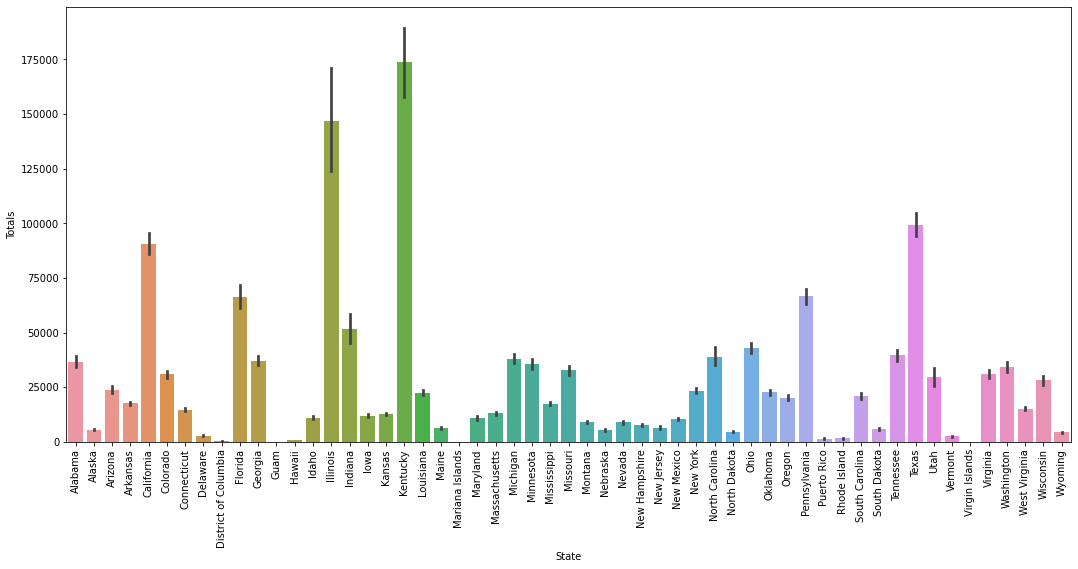

In [13]:
import seaborn as sns

fig = plt.figure(figsize=(18, 8))

sns.barplot(x = 'state',
            y = 'totals',
            data = data)
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Totals")
 
# Show the plot
plt.show()

### Research Question 2 (How many guns are accounted for in each state?) 

Created a column named 'Total accounted guns'

In [14]:
data['Total accounted guns'] = data.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]].sum(axis = 1)

data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns
0,2022-06-01,Alabama,19380.0,389.0,20615.0,12473.0,1670.0,1168,0.0,17.0,...,0.0,0.0,26.0,29.0,8.0,0.0,0.0,0.0,59049,39280.0
1,2022-06-01,Alaska,225.0,13.0,3265.0,2451.0,355.0,223,0.0,3.0,...,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,6821,6583.0
2,2022-06-01,Arizona,7912.0,1369.0,21680.0,10684.0,2246.0,1487,0.0,5.0,...,0.0,0.0,12.0,7.0,2.0,1.0,0.0,0.0,47044,37763.0
3,2022-06-01,Arkansas,2495.0,494.0,7462.0,4881.0,624.0,453,11.0,10.0,...,0.0,0.0,7.0,11.0,1.0,0.0,0.0,0.0,18337,15348.0
4,2022-06-01,California,20367.0,11254.0,43113.0,27018.0,7422.0,0,0.0,0.0,...,0.0,0.0,7848.0,3128.0,779.0,39.0,19.0,1.0,123930,92309.0


### NOTE: 
The total amount of guns, *totals* recorded in some states surpassed the accounted number of guns, *Total accounted guns*. In some states, it is vice versa.

### Research Question 3 (How many guns were actually accounted for in each state compared to the Total guns recorded?)

named the column "Percent unaccounted guns"

In [15]:
data['Percent unaccounted guns'] = ((data['totals']- data['Total accounted guns'])/data['totals']) * 100

In [16]:
data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns
0,2022-06-01,Alabama,19380.0,389.0,20615.0,12473.0,1670.0,1168,0.0,17.0,...,0.0,26.0,29.0,8.0,0.0,0.0,0.0,59049,39280.0,33.478975
1,2022-06-01,Alaska,225.0,13.0,3265.0,2451.0,355.0,223,0.0,3.0,...,0.0,3.0,2.0,0.0,0.0,0.0,0.0,6821,6583.0,3.489224
2,2022-06-01,Arizona,7912.0,1369.0,21680.0,10684.0,2246.0,1487,0.0,5.0,...,0.0,12.0,7.0,2.0,1.0,0.0,0.0,47044,37763.0,19.728339
3,2022-06-01,Arkansas,2495.0,494.0,7462.0,4881.0,624.0,453,11.0,10.0,...,0.0,7.0,11.0,1.0,0.0,0.0,0.0,18337,15348.0,16.300376
4,2022-06-01,California,20367.0,11254.0,43113.0,27018.0,7422.0,0,0.0,0.0,...,0.0,7848.0,3128.0,779.0,39.0,19.0,1.0,123930,92309.0,25.515210


C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


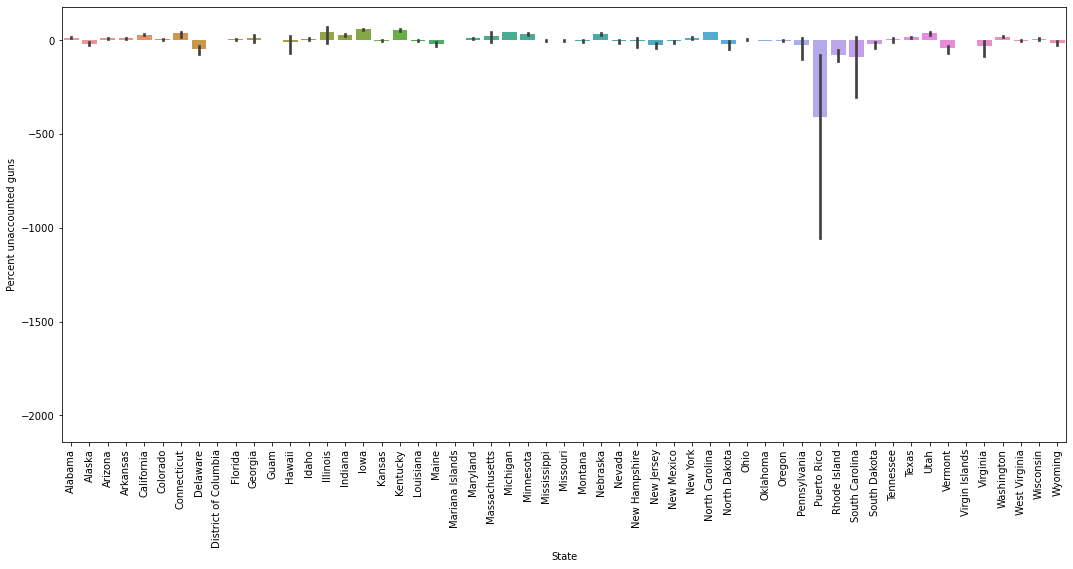

In [17]:
import seaborn as sns

fig = plt.figure(figsize=(18, 8))

sns.barplot(x = 'state',
            y = 'Percent unaccounted guns',
            data = data)
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Percent unaccounted guns")
 
# Show the plot
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


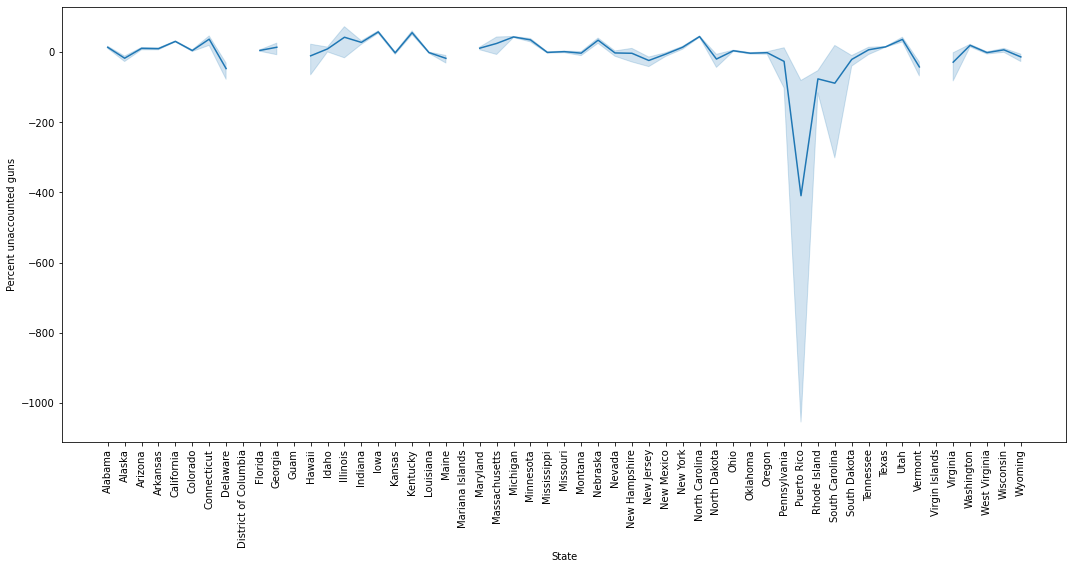

In [18]:
import seaborn as sns

fig = plt.figure(figsize=(18, 8))

sns.lineplot(x = 'state',
            y = 'Percent unaccounted guns',
            data = data)
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Percent unaccounted guns")
 
# Show the plot
plt.show()

In [19]:
data.groupby('state').sum()  

#Total guns accounted for in some states were not accounted for. 
# While in some states the accounted guns were more than guns actually recorded. 
# Below is the % of guns that were not accounted for in each state.

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2659253.0,1975310.2,3269592.0,3366185.0,177626.7,154532,34.0,5635.5,7356.5,160.6,...,21.2,11545.6,7236.4,1374.0,249.2,248.0,38.6,10416881,7880335.4,3.885245e+03
Alaska,25440.0,1953302.2,612254.0,737138.0,111715.7,41164,19.0,1298.5,1768.5,61.6,...,21.2,10609.6,6733.4,1151.0,212.2,189.0,20.6,1547182,1666457.4,-4.946728e+03
Arizona,1111542.0,1998420.2,2865958.0,2038503.0,225770.7,156874,6643.0,2254.5,1477.5,153.6,...,21.2,11145.6,6605.4,1248.0,240.2,225.0,27.6,6784646,5772701.4,3.015564e+03
Arkansas,714846.0,2007031.2,1409504.0,2061081.0,113994.7,87486,3289.0,2505.5,4972.5,98.6,...,21.2,10575.6,6745.4,1190.0,230.2,219.0,29.6,5025112,4401252.4,2.773258e+03
California,8299554.0,2161032.2,8381164.0,7579080.0,715077.7,207875,34007.0,216.5,275.5,62.6,...,21.2,147851.6,62644.4,12726.0,893.2,526.0,25.6,25723254,17360685.4,8.658003e+03
Colorado,894991.0,1952487.2,3754518.0,3546900.0,234986.7,394821,2972.7,216.5,273.5,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,8780094,8030684.1,1.254685e+03
Connecticut,2052607.0,1979836.2,1213737.0,757957.0,162395.7,8024,29096.0,178.5,255.5,115.6,...,21.2,15431.6,7501.4,2061.0,241.2,202.0,23.6,4184486,2250614.3,1.046705e+04
Delaware,46219.0,1952134.2,347034.0,339443.0,92182.7,15130,51.0,312.5,400.5,62.6,...,21.2,15076.6,8117.4,1417.0,282.2,226.0,21.6,780059,879723.4,-1.334681e+04
District of Columbia,27103.0,1952135.2,17707.0,948.0,75707.7,136,82.0,178.5,255.5,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,47047,166279.7,-inf


In [20]:
data.groupby('state').sum().sort_values(by = 'Percent unaccounted guns').tail(5)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns
state,,,,,,,,,,,,,,,,,,,,,
Illinois,14201533.0,22416337.2,3872929.0,2968947.0,91650.7,160103,1.0,183.6,255.5,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,41683663,7163815.5,12020.463321
Michigan,4442550.0,2194019.2,2125448.0,3743824.0,196201.7,55877,3246.0,278.5,1581.5,120.6,...,21.2,11347.6,6818.4,1162.0,236.2,208.0,29.6,10823109,6284557.4,12248.008925
North Carolina,5749502.0,1955594.2,259050.0,3864832.0,192151.7,49669,214.0,3128.5,5488.5,166.6,...,263.2,10174.6,7316.4,1238.0,236.2,278.0,36.6,10979243,5372164.4,12559.763196
Kentucky,32535312.0,12328297.2,2503274.0,2791048.0,129340.7,150567,37156.0,4028.5,6138.5,126.6,...,21.2,11470.6,7400.4,1201.0,251.2,241.0,33.6,49292581,6526989.4,15707.181314
Iowa,1917866.0,2369639.2,63504.0,945809.0,82145.7,2259,1709.0,189.5,499.5,61.6,...,21.2,9757.6,5980.4,1085.0,200.2,181.0,18.6,3384687,1195199.4,16326.375614


#### Iowa has the highest unaccounted guns

In [21]:
data.groupby('state').sum().sort_values(by = 'Percent unaccounted guns').head(20)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns
state,,,,,,,,,,,,,,,,,,,,,
Virgin Islands,114758.0,1952134.2,86751.1,80809.0,75725.7,95,776.1,244.8,357.7,53.6,...,21.2,9820.6,5708.4,1062.0,200.2,177.0,18.6,23281,327732.7,-inf
District of Columbia,27103.0,1952135.2,17707.0,948.0,75707.7,136,82.0,178.5,255.5,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,47047,166279.7,-inf
Guam,0.0,1952134.2,16620.0,10059.0,77681.7,913,0.0,178.5,255.5,54.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,20.6,29591,175474.4,-inf
Mariana Islands,67545.0,1952134.2,67657.9,72830.3,75785.7,85,405.6,188.7,262.8,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,1681,287970.9,-inf
Puerto Rico,0.0,1952134.2,327633.0,45202.0,81902.7,6048,0.0,262.5,285.5,70.6,...,21.2,25890.6,7257.4,1132.0,314.2,208.0,23.6,405102,550985.4,-1.162483e+05
South Carolina,1493208.0,1976508.2,2125232.0,1762085.0,155022.7,81640,195.0,1737.5,1779.5,117.6,...,21.2,10849.6,6493.4,1174.0,240.2,207.0,30.6,5951050,4579351.4,-2.516777e+04
Rhode Island,0.0,1952134.2,214478.0,171627.0,86187.7,38768,0.0,183.5,261.5,56.6,...,21.2,10711.6,6206.4,1123.0,272.2,252.0,19.6,449245,595128.4,-2.168001e+04
Delaware,46219.0,1952134.2,347034.0,339443.0,92182.7,15130,51.0,312.5,400.5,62.6,...,21.2,15076.6,8117.4,1417.0,282.2,226.0,21.6,780059,879723.4,-1.334681e+04
Vermont,3.0,1952134.2,288930.0,385399.0,89602.7,14037,130.0,239.6,334.8,66.6,...,21.2,9897.6,5955.4,1083.0,205.2,179.0,18.6,704013,849905.8,-1.200884e+04


### Research Question 4 (What state has the highest gun permit?)

In [22]:
#What state has the highest gun permit?

data.groupby('state').sum().sort_values(by = 'permit').tail(5) #Kentucky has the highest gun permits

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns
state,,,,,,,,,,,,,,,,,,,,,
Texas,4812217.0,1952134.2,10067864.0,9787385.0,517875.7,559617,34405.0,12933.5,12140.5,397.6,...,21.2,15309.6,9858.4,1753.0,351.2,359.0,60.6,28130432,23464098.4,4211.196726
North Carolina,5749502.0,1955594.2,259050.0,3864832.0,192151.7,49669,214.0,3128.5,5488.5,166.6,...,263.2,10174.6,7316.4,1238.0,236.2,278.0,36.6,10979243,5372164.4,12559.763196
California,8299554.0,2161032.2,8381164.0,7579080.0,715077.7,207875,34007.0,216.5,275.5,62.6,...,21.2,147851.6,62644.4,12726.0,893.2,526.0,25.6,25723254,17360685.4,8658.003232
Illinois,14201533.0,22416337.2,3872929.0,2968947.0,91650.7,160103,1.0,183.6,255.5,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,41683663,7163815.5,12020.463321
Kentucky,32535312.0,12328297.2,2503274.0,2791048.0,129340.7,150567,37156.0,4028.5,6138.5,126.6,...,21.2,11470.6,7400.4,1201.0,251.2,241.0,33.6,49292581,6526989.4,15707.181314


#### Ans 4 : Kentucky has the highest gun permits

In [23]:
data.groupby('state').sum().sort_values(by = 'permit_recheck').tail(5) #lllinois has highest permit rechecks

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns
state,,,,,,,,,,,,,,,,,,,,,
Minnesota,3621379.0,3192433.2,1824237.0,3063060.0,174541.7,77279,1.0,405.5,1194.5,80.6,...,21.2,10985.6,7068.4,1184.0,219.2,214.0,26.6,10082205,5366410.4,9903.568092
Utah,3580099.0,4561409.2,878051.0,1207491.0,113386.7,25427,4.0,468.5,586.8,125.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,8433303,2389819.7,10286.216172
Indiana,3792942.0,5685524.2,3521385.0,3150414.0,258109.7,132836,2963.0,686.5,1386.5,168.6,...,21.2,13721.6,8639.4,2065.0,369.2,347.0,36.6,14683839,7303390.4,7856.829831
Kentucky,32535312.0,12328297.2,2503274.0,2791048.0,129340.7,150567,37156.0,4028.5,6138.5,126.6,...,21.2,11470.6,7400.4,1201.0,251.2,241.0,33.6,49292581,6526989.4,15707.181314
Illinois,14201533.0,22416337.2,3872929.0,2968947.0,91650.7,160103,1.0,183.6,255.5,53.6,...,21.2,9699.6,5699.4,1062.0,200.2,177.0,18.6,41683663,7163815.5,12020.463321


### Research Question 5 (Percentage gun permit to permit-recheck in each state?)

Named "uncheck permit". That is, the percentage of gun permits that were not renewed.

In [24]:
#check the % of the permit to permit-recheck in each state

data['uncheck permit'] = ((data['permit']- data['permit_recheck'])/data['permit']) * 100

In [25]:
data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
0,2022-06-01,Alabama,19380.0,389.0,20615.0,12473.0,1670.0,1168,0.0,17.0,...,26.0,29.0,8.0,0.0,0.0,0.0,59049,39280.0,33.478975,97.992776
1,2022-06-01,Alaska,225.0,13.0,3265.0,2451.0,355.0,223,0.0,3.0,...,3.0,2.0,0.0,0.0,0.0,0.0,6821,6583.0,3.489224,94.222222
2,2022-06-01,Arizona,7912.0,1369.0,21680.0,10684.0,2246.0,1487,0.0,5.0,...,12.0,7.0,2.0,1.0,0.0,0.0,47044,37763.0,19.728339,82.697169
3,2022-06-01,Arkansas,2495.0,494.0,7462.0,4881.0,624.0,453,11.0,10.0,...,7.0,11.0,1.0,0.0,0.0,0.0,18337,15348.0,16.300376,80.200401
4,2022-06-01,California,20367.0,11254.0,43113.0,27018.0,7422.0,0,0.0,0.0,...,7848.0,3128.0,779.0,39.0,19.0,1.0,123930,92309.0,25.515210,44.743949


### Generally: US as a country

### Research Question 6 (Trend of gun accussation through the years, Nov 1998 to June 2022?)

In [26]:
data['monthyear'] = data['month'].dt.to_period('M')

In [27]:
df1 = data.groupby(data['month'].dt.to_period('M')).sum() 
# created a new data table named 'df1' and converted 'month' to just month-year.

In [28]:
df1.shape

(284, 28)

In [29]:
df1.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
month,,,,,,,,,,,,,,,,,,,,,
1998-11,2073.0,518683.0,6859.0,11909.0,32785.5,275,60.0,280.5,401.5,22.0,...,3014.0,1771.0,330.0,60.5,55.0,5.5,21176,118427.5,-inf,-inf
1998-12,83601.0,518683.0,220562.1,578901.7,32785.5,8445,2209.7,280.5,401.5,22.0,...,3014.0,1771.0,330.0,60.5,55.0,5.5,870722,909443.0,-inf,-inf
1999-01,84577.0,518683.0,191918.1,317934.7,32785.5,7498,7043.7,280.5,401.5,22.0,...,3014.0,1771.0,330.0,60.5,55.0,5.5,585974,623719.0,-inf,-inf
1999-02,92264.0,518683.0,239870.1,360430.7,32785.5,9226,11421.7,280.5,401.5,22.0,...,3014.0,1771.0,330.0,60.5,55.0,5.5,690215,720273.0,-inf,-inf
1999-03,110690.0,518683.0,248458.1,384794.7,32785.5,9537,11204.7,280.5,401.5,22.0,...,3014.0,1771.0,330.0,60.5,55.0,5.5,741687,753319.0,-inf,-inf


In [30]:
data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit,monthyear
0,2022-06-01,Alabama,19380.0,389.0,20615.0,12473.0,1670.0,1168,0.0,17.0,...,29.0,8.0,0.0,0.0,0.0,59049,39280.0,33.478975,97.992776,2022-06
1,2022-06-01,Alaska,225.0,13.0,3265.0,2451.0,355.0,223,0.0,3.0,...,2.0,0.0,0.0,0.0,0.0,6821,6583.0,3.489224,94.222222,2022-06
2,2022-06-01,Arizona,7912.0,1369.0,21680.0,10684.0,2246.0,1487,0.0,5.0,...,7.0,2.0,1.0,0.0,0.0,47044,37763.0,19.728339,82.697169,2022-06
3,2022-06-01,Arkansas,2495.0,494.0,7462.0,4881.0,624.0,453,11.0,10.0,...,11.0,1.0,0.0,0.0,0.0,18337,15348.0,16.300376,80.200401,2022-06
4,2022-06-01,California,20367.0,11254.0,43113.0,27018.0,7422.0,0,0.0,0.0,...,3128.0,779.0,39.0,19.0,1.0,123930,92309.0,25.515210,44.743949,2022-06


In [31]:
df1.reset_index(level=0, inplace=True) #converted the index 'month' to a column
df1.head()

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
0,1998-11,2073.0,518683.0,6859.0,11909.0,32785.5,275,60.0,280.5,401.5,...,3014.0,1771.0,330.0,60.5,55.0,5.5,21176,118427.5,-inf,-inf
1,1998-12,83601.0,518683.0,220562.1,578901.7,32785.5,8445,2209.7,280.5,401.5,...,3014.0,1771.0,330.0,60.5,55.0,5.5,870722,909443.0,-inf,-inf
2,1999-01,84577.0,518683.0,191918.1,317934.7,32785.5,7498,7043.7,280.5,401.5,...,3014.0,1771.0,330.0,60.5,55.0,5.5,585974,623719.0,-inf,-inf
3,1999-02,92264.0,518683.0,239870.1,360430.7,32785.5,9226,11421.7,280.5,401.5,...,3014.0,1771.0,330.0,60.5,55.0,5.5,690215,720273.0,-inf,-inf
4,1999-03,110690.0,518683.0,248458.1,384794.7,32785.5,9537,11204.7,280.5,401.5,...,3014.0,1771.0,330.0,60.5,55.0,5.5,741687,753319.0,-inf,-inf


In [32]:
df1.tail()  #2022 data stopped at June 2022

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
279,2022-02,645560.0,517153.0,736494.0,441318.0,57645.0,26365,371.0,276.0,186.0,...,11067.0,4984.0,1136.0,81.0,72.0,4.0,2514818,1352105.0,1518.372620,-59600.138704
280,2022-03,790629.0,554258.0,914071.0,554997.0,74221.0,31996,579.0,241.0,174.0,...,12243.0,5767.0,1433.0,105.0,74.0,10.0,3014465,1669578.0,1511.386884,-42423.601555
281,2022-04,650140.0,524009.0,750381.0,446121.0,60232.0,25062,528.0,201.0,138.0,...,10694.0,4961.0,1183.0,82.0,59.0,4.0,2534057,1359908.0,1539.757712,-42870.005709
282,2022-05,594272.0,503124.0,663455.0,365102.0,51058.0,22886,533.0,190.0,100.0,...,10722.0,4600.0,1074.0,84.0,73.0,9.0,2272187,1174791.0,1611.544889,-57945.898500
283,2022-06,655262.0,489759.0,763168.0,436141.0,75581.0,28908,537.0,241.0,116.0,...,11282.0,5013.0,1374.0,106.0,90.0,5.0,2527308,1382287.0,1545.521452,-54938.006356


In [33]:
df2 = data.groupby(data['month'].dt.year).sum()  

#converted the month column to year and created a new data table called df2

df2.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
month,,,,,,,,,,,,,,,,,,,,,
1998,85674.0,1037366.0,227421.1,590810.7,65571.0,8720,2269.7,561.0,803.0,44.0,...,6028.0,3542.0,660.0,121.0,110.0,11.0,891898,1027870.5,-inf,-inf
1999,1090235.0,6224196.0,2588692.7,5273588.9,393426.0,103743,148469.9,3366.0,4818.0,264.0,...,36168.0,21252.0,3960.0,726.0,660.0,66.0,9043747,9306388.5,-inf,-inf
2000,1227814.0,6224196.0,2191879.0,4779978.0,393426.0,95777,131648.0,3366.0,4818.0,264.0,...,36168.0,21252.0,3960.0,726.0,660.0,66.0,8427096,8391176.0,-inf,-inf
2001,1408338.0,6224196.0,2167213.0,4943375.0,393426.0,97132,100126.0,3803.6,6879.5,264.0,...,36168.0,21252.0,3960.0,726.0,660.0,66.0,8820045,8435372.1,-inf,-inf
2002,1363211.0,6224196.0,1845112.0,4409311.0,393426.0,93069,76826.7,5087.1,11094.6,264.0,...,36168.0,21252.0,3960.0,726.0,660.0,66.0,8367069,7523893.6,-inf,-inf


In [34]:
df2.shape

(25, 28)

In [35]:
df2.reset_index(level=0, inplace=True)  #converted the index 'month' to a column

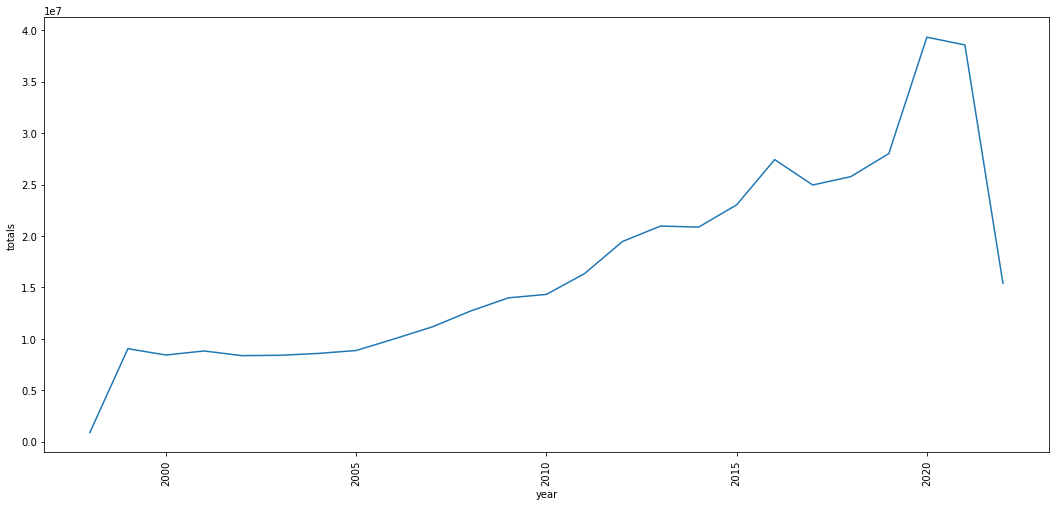

In [36]:
fig = plt.figure(figsize=(18, 8))

sns.lineplot(x = 'month',
            y = 'totals',
            data = df2)
plt.xlabel("year")
plt.xticks(rotation=90)
plt.ylabel("totals")
 
# Show the plot
plt.show()

#We can see a trend of increase in gun possession approxiamately every year. NOTE: 2022 data stopped at June 2022

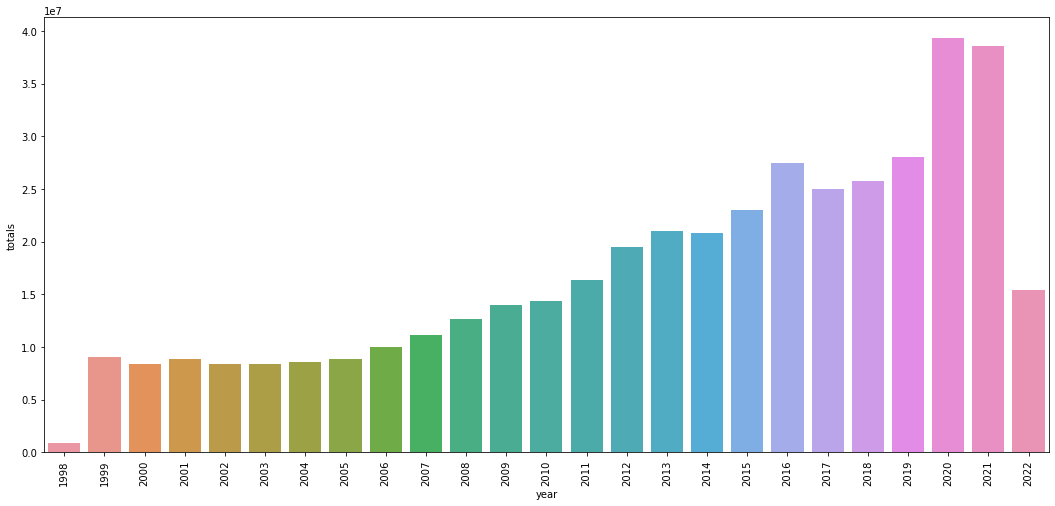

In [37]:
fig = plt.figure(figsize=(18, 8))

sns.barplot(x = 'month',
            y = 'totals',
            data = df2)
plt.xlabel("year")
plt.xticks(rotation=90)
plt.ylabel("totals")
 
# Show the plot
plt.show()

#We can see a trend of increase in gun possession approxiamately every year. NOTE: 2022 data stopped at June 2022

#### Ans 6: We can see a trend of increase in gun possession approximately every year. NOTE: 2022 data stopped at June 2022

### Research Question 7  (Trend of gun permit and rechecks through the years, Nov 1998 to June 2022?)

In [38]:
df3 = data.groupby(data['permit']).sum()

df3.head()

,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
permit,,,,,,,,,,,,,,,,,,,,,
0.0,4.327702e+07,19967395.0,25999759.0,2312193.5,1029685,125993.4,23656.5,44529.5,1565.8,1462197.2,...,256825.4,144070.6,26202.0,5075.3,4492.0,499.6,50087770,5.408436e+07,-inf,-inf
1.0,5.375442e+05,469064.0,480998.0,19867.7,33160,2952.0,371.4,432.2,16.0,24113.2,...,2904.6,1728.4,326.0,63.5,55.0,5.4,1032799,1.073298e+06,-1671.161487,-5.374822e+07
2.0,3.017792e+05,213394.0,220735.0,15741.0,10933,1678.0,224.9,284.7,9.0,16580.7,...,1636.2,979.8,190.0,32.9,29.0,4.0,482129,5.086676e+05,-3851.505591,-1.508546e+07
3.0,1.791814e+05,111594.0,140521.0,8591.4,8264,21.0,99.6,156.8,5.6,6607.8,...,986.4,579.6,108.0,20.9,18.0,1.8,274639,2.925452e+05,-579.924330,-5.970713e+06
4.0,1.603202e+05,105120.0,133760.0,9048.0,5305,794.0,111.5,173.5,7.4,9754.5,...,875.0,529.0,113.0,20.5,18.0,1.5,270934,2.847607e+05,-9512.108335,-4.006105e+06


In [39]:
df3.reset_index(level=0, inplace=True)
df3.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total accounted guns,Percent unaccounted guns,uncheck permit
0,0.0,4.327702e+07,19967395.0,25999759.0,2312193.5,1029685,125993.4,23656.5,44529.5,1565.8,...,256825.4,144070.6,26202.0,5075.3,4492.0,499.6,50087770,5.408436e+07,-inf,-inf
1,1.0,5.375442e+05,469064.0,480998.0,19867.7,33160,2952.0,371.4,432.2,16.0,...,2904.6,1728.4,326.0,63.5,55.0,5.4,1032799,1.073298e+06,-1671.161487,-5.374822e+07
2,2.0,3.017792e+05,213394.0,220735.0,15741.0,10933,1678.0,224.9,284.7,9.0,...,1636.2,979.8,190.0,32.9,29.0,4.0,482129,5.086676e+05,-3851.505591,-1.508546e+07
3,3.0,1.791814e+05,111594.0,140521.0,8591.4,8264,21.0,99.6,156.8,5.6,...,986.4,579.6,108.0,20.9,18.0,1.8,274639,2.925452e+05,-579.924330,-5.970713e+06
4,4.0,1.603202e+05,105120.0,133760.0,9048.0,5305,794.0,111.5,173.5,7.4,...,875.0,529.0,113.0,20.5,18.0,1.5,270934,2.847607e+05,-9512.108335,-4.006105e+06


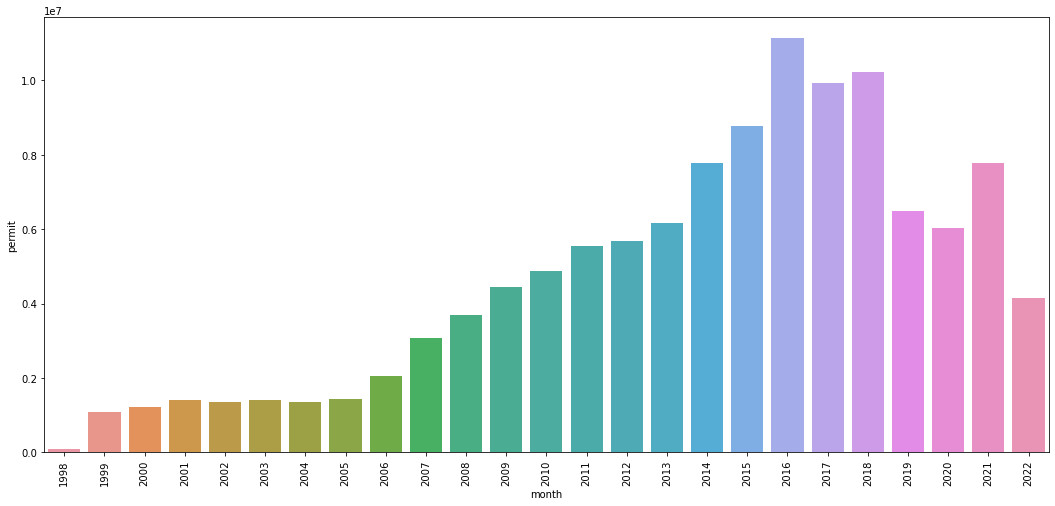

In [40]:
fig = plt.figure(figsize=(18, 8))

sns.barplot(x = df2['month'],
            y = df2['permit'])
plt.xlabel("month")
plt.xticks(rotation=90)
plt.ylabel("permit")
 
# Show the plot
plt.show()

#Also,we can see a trend of increase in gun permit approxiamately every year. NOTE: 2022 data stopped at June 2022

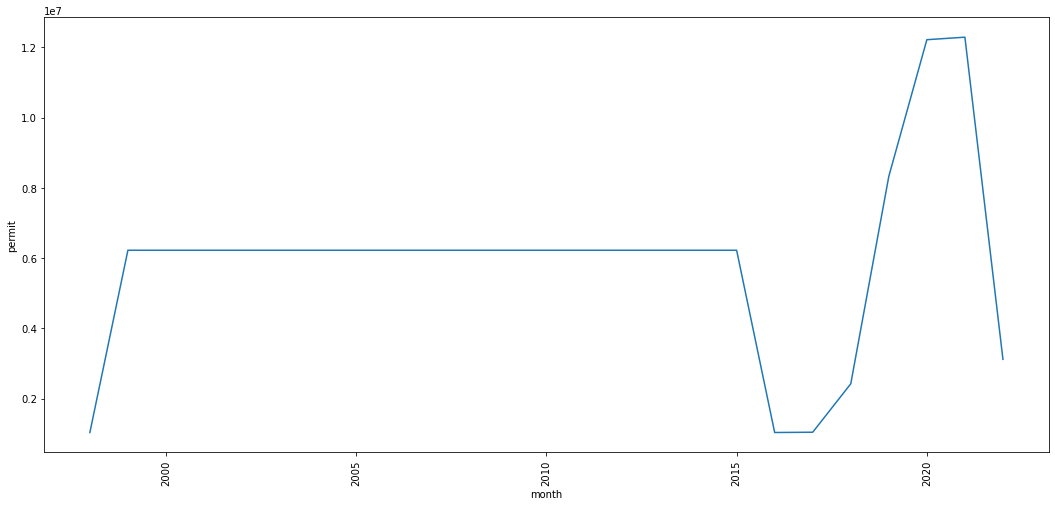

In [41]:
fig = plt.figure(figsize=(18, 8))

sns.lineplot(x = df2['month'],
            y = df2['permit_recheck'])
plt.xlabel("month")
plt.xticks(rotation=90)
plt.ylabel("permit")
 
# Show the plot
plt.show()

#Also,we can see a trend of increase in gun permit approxiamately every year. NOTE: 2022 data stopped at June 2022

### Research Question 8  (Total number of gun possessions in the US?)

In [42]:
data['totals'].sum()

423659927

#### Ans 8:   423,659,927 guns

### Research Question 9  (Type of guns in demand over the years)

<AxesSubplot:>

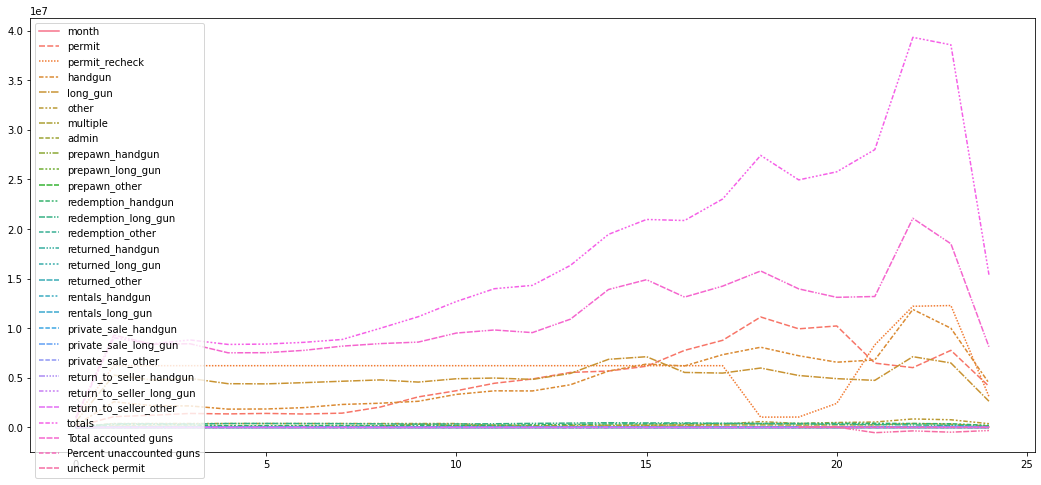

In [47]:
fig = plt.figure(figsize=(18, 8))
sns.lineplot(data = df2)

In [45]:
df5 = df2[['handgun','long_gun','prepawn_handgun','prepawn_long_gun']]

<AxesSubplot:>

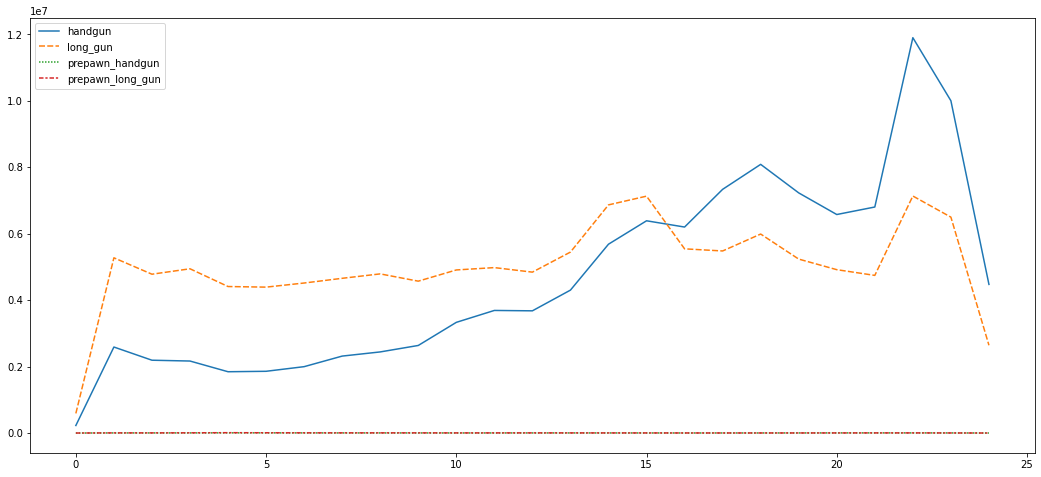

In [48]:
fig = plt.figure(figsize=(18, 8))
sns.lineplot(data = df5)   #This chart shows how Hand guns have the highest demand.

### Ans 9: The chart above shows how *Hand guns* have the highest demand.

**CONCLUSION**
- There is a trend of increase in gun possession approxiamately every year.

- Kentucky with the highest gun permission rate.

- Iowa has the record for lowest unaccounted guns.

- 423,659,927 guns are released in the US

- *Hand guns* have the highest demand.